In [1]:
import numpy as np
from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

Using TensorFlow backend.


In [3]:
path = '1661-0.txt'
text = open(path, encoding='utf-8').read().lower()
print('corpus length:', len(text))

corpus length: 581888


In [4]:
tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(text)

In [5]:
unique_words = np.unique(words)
unique_word_index = dict((c, i) for i, c in enumerate(unique_words))

In [6]:
unique_word_index

{'0': 0,
 '000': 1,
 '1': 2,
 '10': 3,
 '100': 4,
 '1000': 5,
 '10_s_': 6,
 '10th': 7,
 '11': 8,
 '117': 9,
 '120': 10,
 '12_s_': 11,
 '12th': 12,
 '14': 13,
 '140': 14,
 '15': 15,
 '150': 16,
 '1500': 17,
 '1661': 18,
 '16a': 19,
 '17': 20,
 '1846': 21,
 '1858': 22,
 '1869': 23,
 '1870': 24,
 '1878': 25,
 '1883': 26,
 '1884': 27,
 '1887': 28,
 '1888': 29,
 '1890': 30,
 '19th': 31,
 '1_s_': 32,
 '2': 33,
 '20': 34,
 '200': 35,
 '2001': 36,
 '2002': 37,
 '2019': 38,
 '220': 39,
 '221b': 40,
 '226': 41,
 '22nd': 42,
 '249': 43,
 '25': 44,
 '250': 45,
 '26': 46,
 '26_s_': 47,
 '27': 48,
 '270': 49,
 '29': 50,
 '2_s_': 51,
 '2nd': 52,
 '3': 53,
 '30': 54,
 '31': 55,
 '35': 56,
 '3rd': 57,
 '4': 58,
 '40': 59,
 '4000': 60,
 '421': 61,
 '4700': 62,
 '4_d_': 63,
 '4th': 64,
 '4½': 65,
 '5': 66,
 '50': 67,
 '501': 68,
 '596': 69,
 '6': 70,
 '60': 71,
 '6221541': 72,
 '64': 73,
 '6_d_': 74,
 '7': 75,
 '700': 76,
 '750': 77,
 '750175': 78,
 '77': 79,
 '7_s_': 80,
 '7th': 81,
 '8': 82,
 '801': 83

# Feature Engineering

In [7]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [8]:
prev_words[2]

['s', 'the', 'adventures', 'of', 'sherlock']

In [9]:
next_words[2]

'holmes'

In [10]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

# RNN

In [11]:
#DEFINE A MODEL
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

#CALLING THE MODEL
optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=200, shuffle=True).history

Train on 103759 samples, validate on 5462 samples
Epoch 1/200
103759/103759 [==============================] - 231s 2ms/step - loss: 6.0141 - accuracy: 0.1065 - val_loss: 7.0574 - val_accuracy: 0.0972
Epoch 2/200
103759/103759 [==============================] - 231s 2ms/step - loss: 5.7879 - accuracy: 0.1475 - val_loss: 7.9669 - val_accuracy: 0.1040
Epoch 3/200
103759/103759 [==============================] - 229s 2ms/step - loss: 5.7420 - accuracy: 0.1761 - val_loss: 8.1956 - val_accuracy: 0.1066
Epoch 4/200
103759/103759 [==============================] - 209s 2ms/step - loss: 5.4168 - accuracy: 0.2115 - val_loss: 8.2061 - val_accuracy: 0.0981
Epoch 5/200
103759/103759 [==============================] - 226s 2ms/step - loss: 5.0758 - accuracy: 0.2514 - val_loss: 8.2620 - val_accuracy: 0.0945
Epoch 6/200
103759/103759 [==============================] - 223s 2ms/step - loss: 4.7402 - accuracy: 0.2920 - val_loss: 8.5477 - val_accuracy: 0.0943
Epoch 7/200
103759/103759 [=================

103759/103759 [==============================] - 138s 1ms/step - loss: 2.6321 - accuracy: 0.7113 - val_loss: 11.7313 - val_accuracy: 0.0525
Epoch 108/200
103759/103759 [==============================] - 138s 1ms/step - loss: 2.6297 - accuracy: 0.7119 - val_loss: 11.9821 - val_accuracy: 0.0524
Epoch 109/200
103759/103759 [==============================] - 137s 1ms/step - loss: 2.6350 - accuracy: 0.7114 - val_loss: 11.9541 - val_accuracy: 0.0507
Epoch 110/200
103759/103759 [==============================] - 138s 1ms/step - loss: 2.6325 - accuracy: 0.7120 - val_loss: 11.7126 - val_accuracy: 0.0538
Epoch 111/200
103759/103759 [==============================] - 139s 1ms/step - loss: 2.6312 - accuracy: 0.7114 - val_loss: 11.6751 - val_accuracy: 0.0518
Epoch 112/200
103759/103759 [==============================] - 138s 1ms/step - loss: 2.6351 - accuracy: 0.7109 - val_loss: 11.7691 - val_accuracy: 0.0518
Epoch 113/200
103759/103759 [==============================] - 138s 1ms/step - loss: 2.628

In [12]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

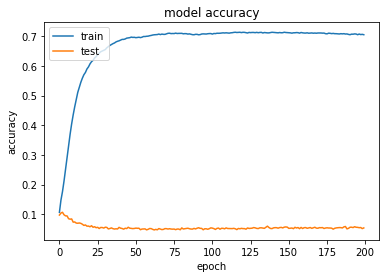

In [14]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

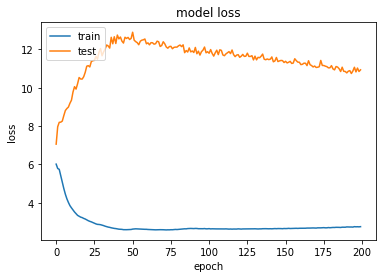

In [15]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')